## Dataset Overview
This dataset provides detailed healthcare records of patients, covering demographic details, medical conditions, hospital admissions, and healthcare services received. The dataset is structured to facilitate data analysis, predictive modeling, and operational insights in the healthcare domain. Below is a detailed description of each column:
#### Patient Information
- Name: The full name of the patient.
- Age: The patient’s age at the time of admission (in years).
- Gender: The patient’s gender, categorized as either Male or Female.
- Blood Type: The patient’s blood group (e.g., A+, O-, B-).
#### Medical & Admission Details
- Medical Condition: The primary diagnosis or condition for which the patient was admitted (e.g., Diabetes, Hypertension, Asthma).
- Date of Admission: The date when the patient was admitted to the healthcare facility.
- Doctor: The name of the attending physician responsible for the patient’s care.
- Hospital: The name of the healthcare facility where the patient was admitted.
- Insurance Provider: The patient’s insurance provider (e.g., Aetna, Blue Cross, Cigna, UnitedHealthcare, Medicare).
- Billing Amount: The total cost of healthcare services billed to the patient, expressed as a floating-point number.
- Room Number: The room assigned to the patient during their hospital stay.
- Admission Type: The nature of the patient’s admission, categorized as Emergency, Elective, or Urgent.
- Discharge Date: The date on which the patient was discharged, determined based on the admission date and a calculated length of stay.

## Loading Libraries & Data Set

In [27]:
# Importing Liberaries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Loading the Data-Set:
df=pd.read_csv("/content/healthcare_dataset.csv")
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


## Inspecting DataFrame

In [29]:
# Checking the shape of data-set (i.e rows & columns):
df.shape

(55500, 15)

In [30]:
# Checking the Information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [31]:
# Checking missing values:
df.isna().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [32]:
#Changing the date dtype:
df['Date of Admission']= pd.to_datetime(df['Date of Admission'])
df['Discharge Date']= pd.to_datetime(df['Discharge Date'])

In [33]:
#Cheking Info (i.e dates dtype changed or not):
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [34]:
# Checking for the Duplicate-Values:
df.duplicated().sum()

534

In [35]:
# Dropping duplicates:
df=df.drop_duplicates()
df.head(2)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive


In [36]:
# Checking Descriptive Stats:
dh=df.iloc[:,[1,9,10]]
dh.describe()

,Age,Billing Amount,Room Number
count,54966.000000,54966.000000,54966.000000
mean,51.535185,25544.306284,301.124404
std,19.605661,14208.409711,115.223143
min,13.000000,-2008.492140,101.000000
25%,35.000000,13243.718641,202.000000
50%,52.000000,25542.749145,302.000000
75%,68.000000,37819.858159,401.000000
max,89.000000,52764.276736,500.000000


## EDA

<Axes: >

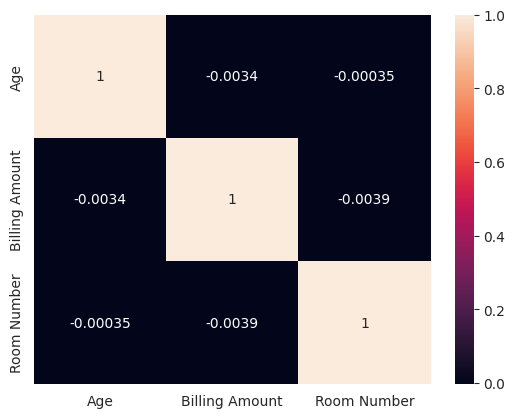

In [37]:
# Checking for Correlation Matrix:
sns.heatmap(dh.corr(),annot=True)

- Hence it shows negative correlation between the features (i.e they are not highly correlated with each others).

<ipython-input-38-ad08e21aa0d9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cx = sns.countplot(data=df, x=col, ax=axes[row, col_pos], palette=palette, saturation=1)
<ipython-input-38-ad08e21aa0d9>:21: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  cx = sns.countplot(data=df, x=col, ax=axes[row, col_pos], palette=palette, saturation=1)
<ipython-input-38-ad08e21aa0d9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cx = sns.countplot(data=df, x=col, ax=axes[row, col_pos], palette=palette, saturation=1)
<ipython-input-38-ad08e21aa0d9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov

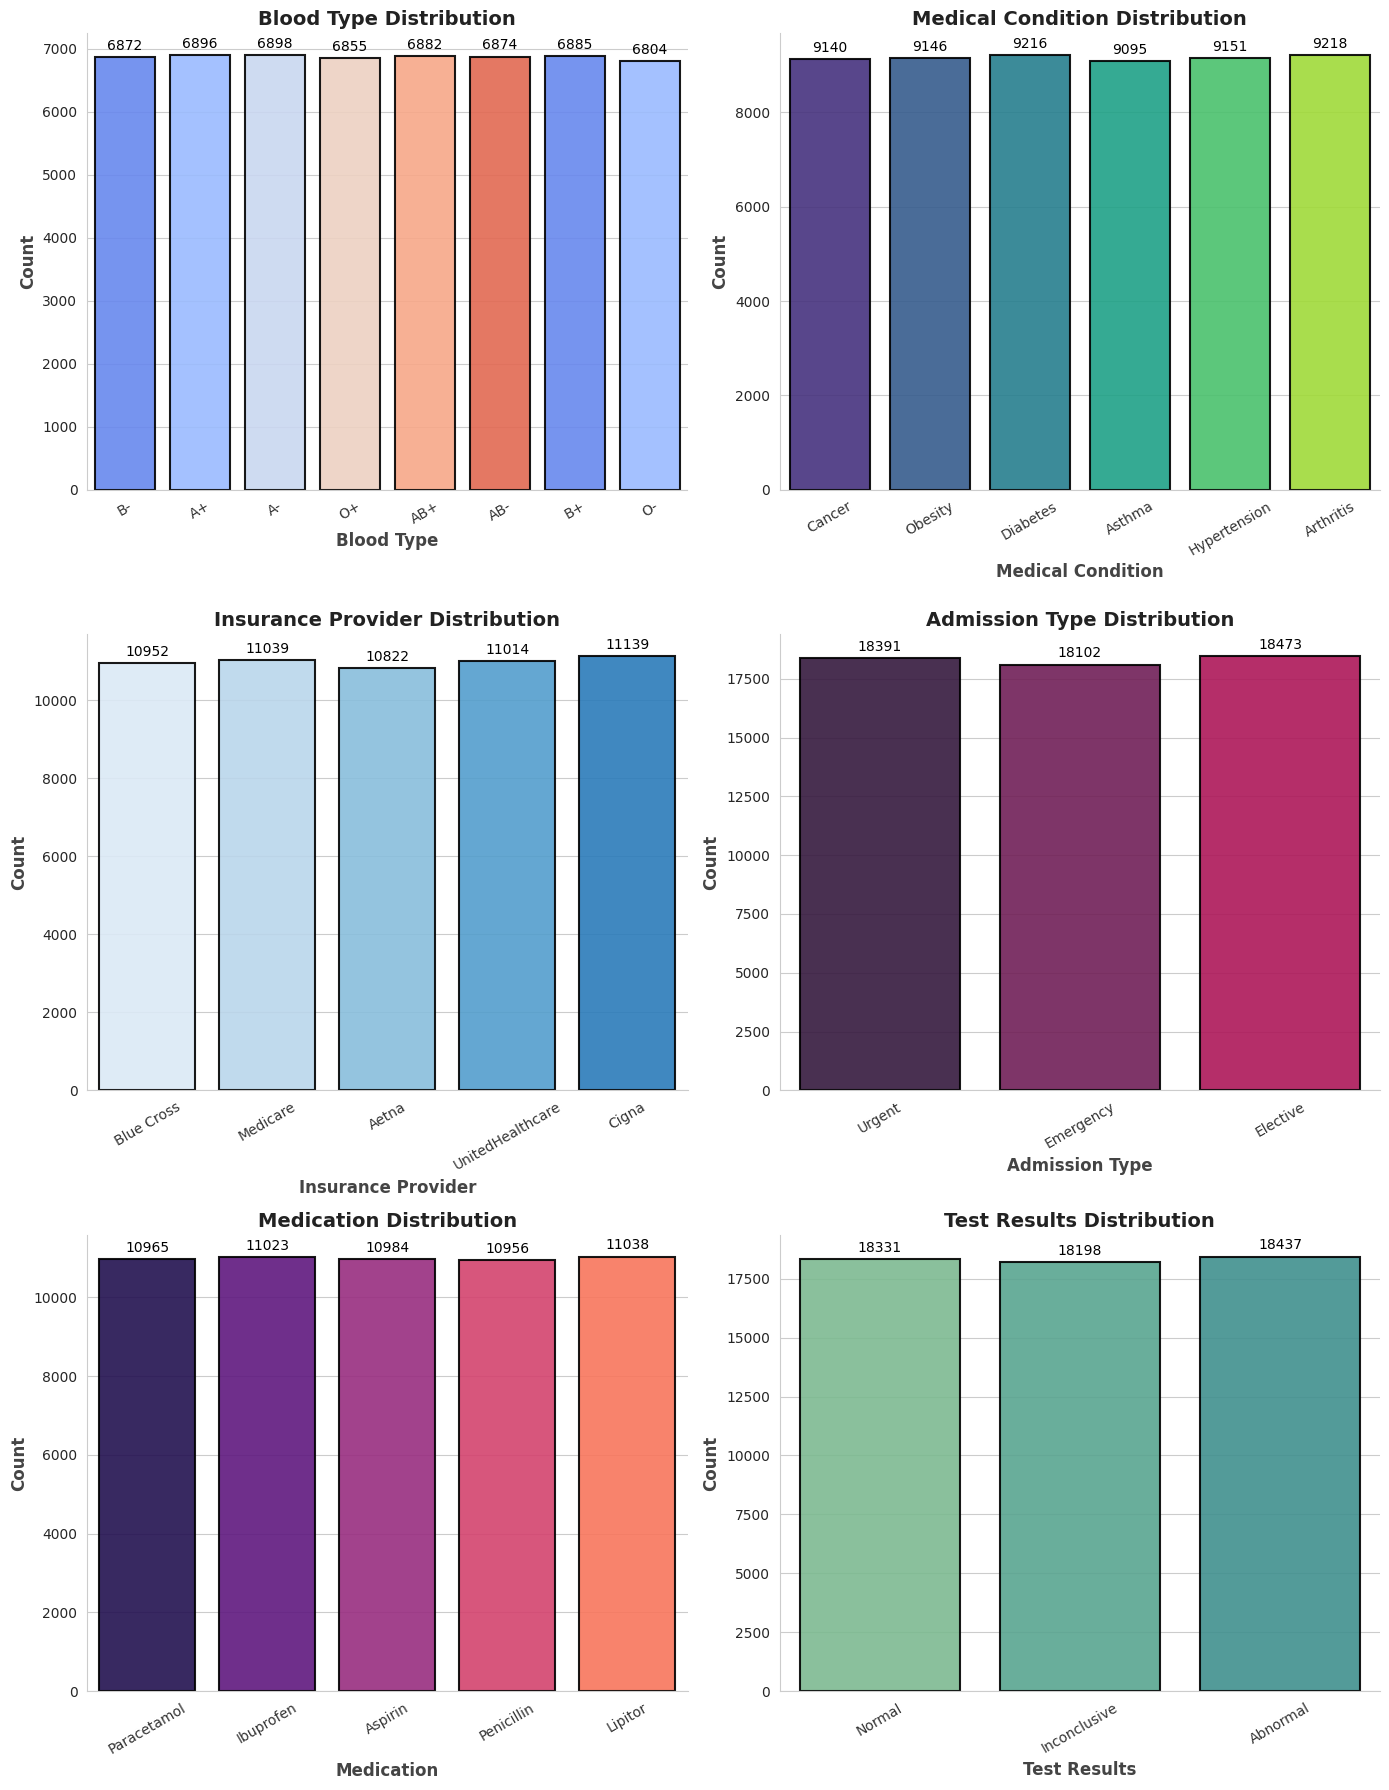

In [38]:
# Finding out the count-wise distribution of patients based on their features:

# Set a modern seaborn style
sns.set_style("whitegrid")

# Create a figure with 6 subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
columns = ["Blood Type", "Medical Condition", "Insurance Provider",
           "Admission Type", "Medication", "Test Results"]

# List of different color palettes for each graph
palettes = [
    "coolwarm", "viridis", "Blues", "rocket", "magma", "crest"
]

# Generate the 6 graphs dynamically
for i, col in enumerate(columns):
    row, col_pos = divmod(i, 2)  # Determine row and column position
    palette = sns.color_palette(palettes[i])  # Assign a different palette for each graph

    cx = sns.countplot(data=df, x=col, ax=axes[row, col_pos], palette=palette, saturation=1)

    # Improve aesthetics for a 3D-like effect
    cx.set_title(f"{col} Distribution", fontsize=14, fontweight='bold', color='#222')
    cx.set_xlabel(col, fontsize=12, fontweight='bold', color='#444')
    cx.set_ylabel("Count", fontsize=12, fontweight='bold', color='#444')
    cx.tick_params(axis='x', rotation=30, labelsize=10, colors='#333')

    # Add labels on bars
    for container in cx.containers:
        cx.bar_label(container, fontsize=10, color='black', padding=3)

    # Enhance 3D effect by adding bar edges and transparency
    for bar in cx.patches:
        bar.set_edgecolor("black")  # Darker edges for depth
        bar.set_linewidth(1.5)
        bar.set_alpha(0.9)  # Slight transparency to simulate shading

    # Remove top & right spines for a cleaner look
    sns.despine(ax=cx)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [39]:
# Checking the counts respect to "Gender"
df['Gender'].value_counts(sort=True)

,count
Gender,
Male,27496
Female,27470


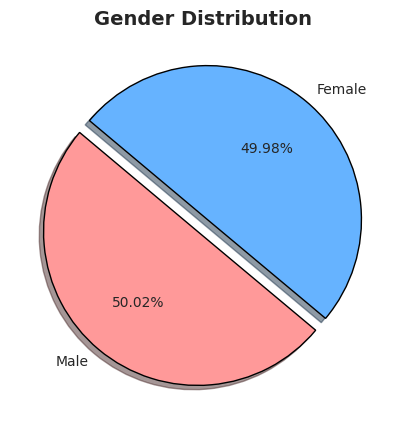

In [40]:
# Define colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Custom pastel colors

# Create the pie chart
plt.figure(figsize=(5, 5))
df['Gender'].value_counts(sort=False).plot(
    kind='pie',
    autopct='%.2f%%',
    colors=colors,
    explode=[0.05] * dg['Gender'].nunique(),  # Slightly separate slices
    shadow=True,
    startangle=140,  # Rotate for better visibility
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Improve edges
)

# Add title
plt.title("Gender Distribution", fontsize=14, fontweight='bold')

# Display the chart
plt.ylabel('')  # Remove default y-label
plt.show()

In [42]:
"""Hence dividing the ages in
Adult: 20–39 years old
Middle age adult: 40–59 years old
Senior adult: 60 years old and above.."""

# Defining in function:
def Gh(de):
    if de['Age']>=20 and de['Age']<=39:
        return "Adult Age"
    elif de['Age']>=40 and de["Age"]<=59:
        return "Middle Age Adult"
    else:
        return "Old Age Adult"
df['Class']=df.apply(Gh,axis=1) # Storing in "Class" column.
df.head(5)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Class
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Adult Age
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Old Age Adult
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Old Age Adult
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Adult Age
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,Middle Age Adult


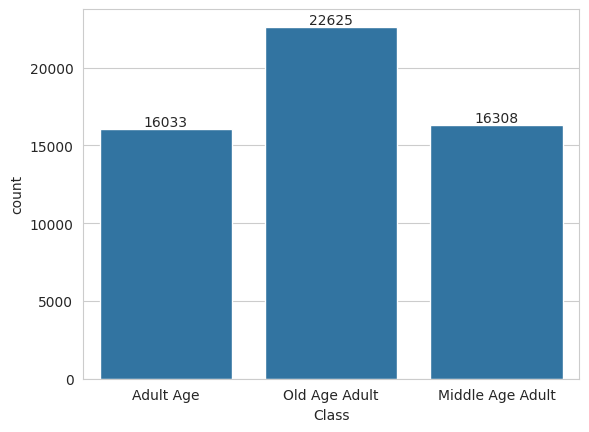

In [43]:
# Distribution based on "Class":
a=sns.countplot(data=df,x="Class")
for container in a.containers:
    a.bar_label(container)

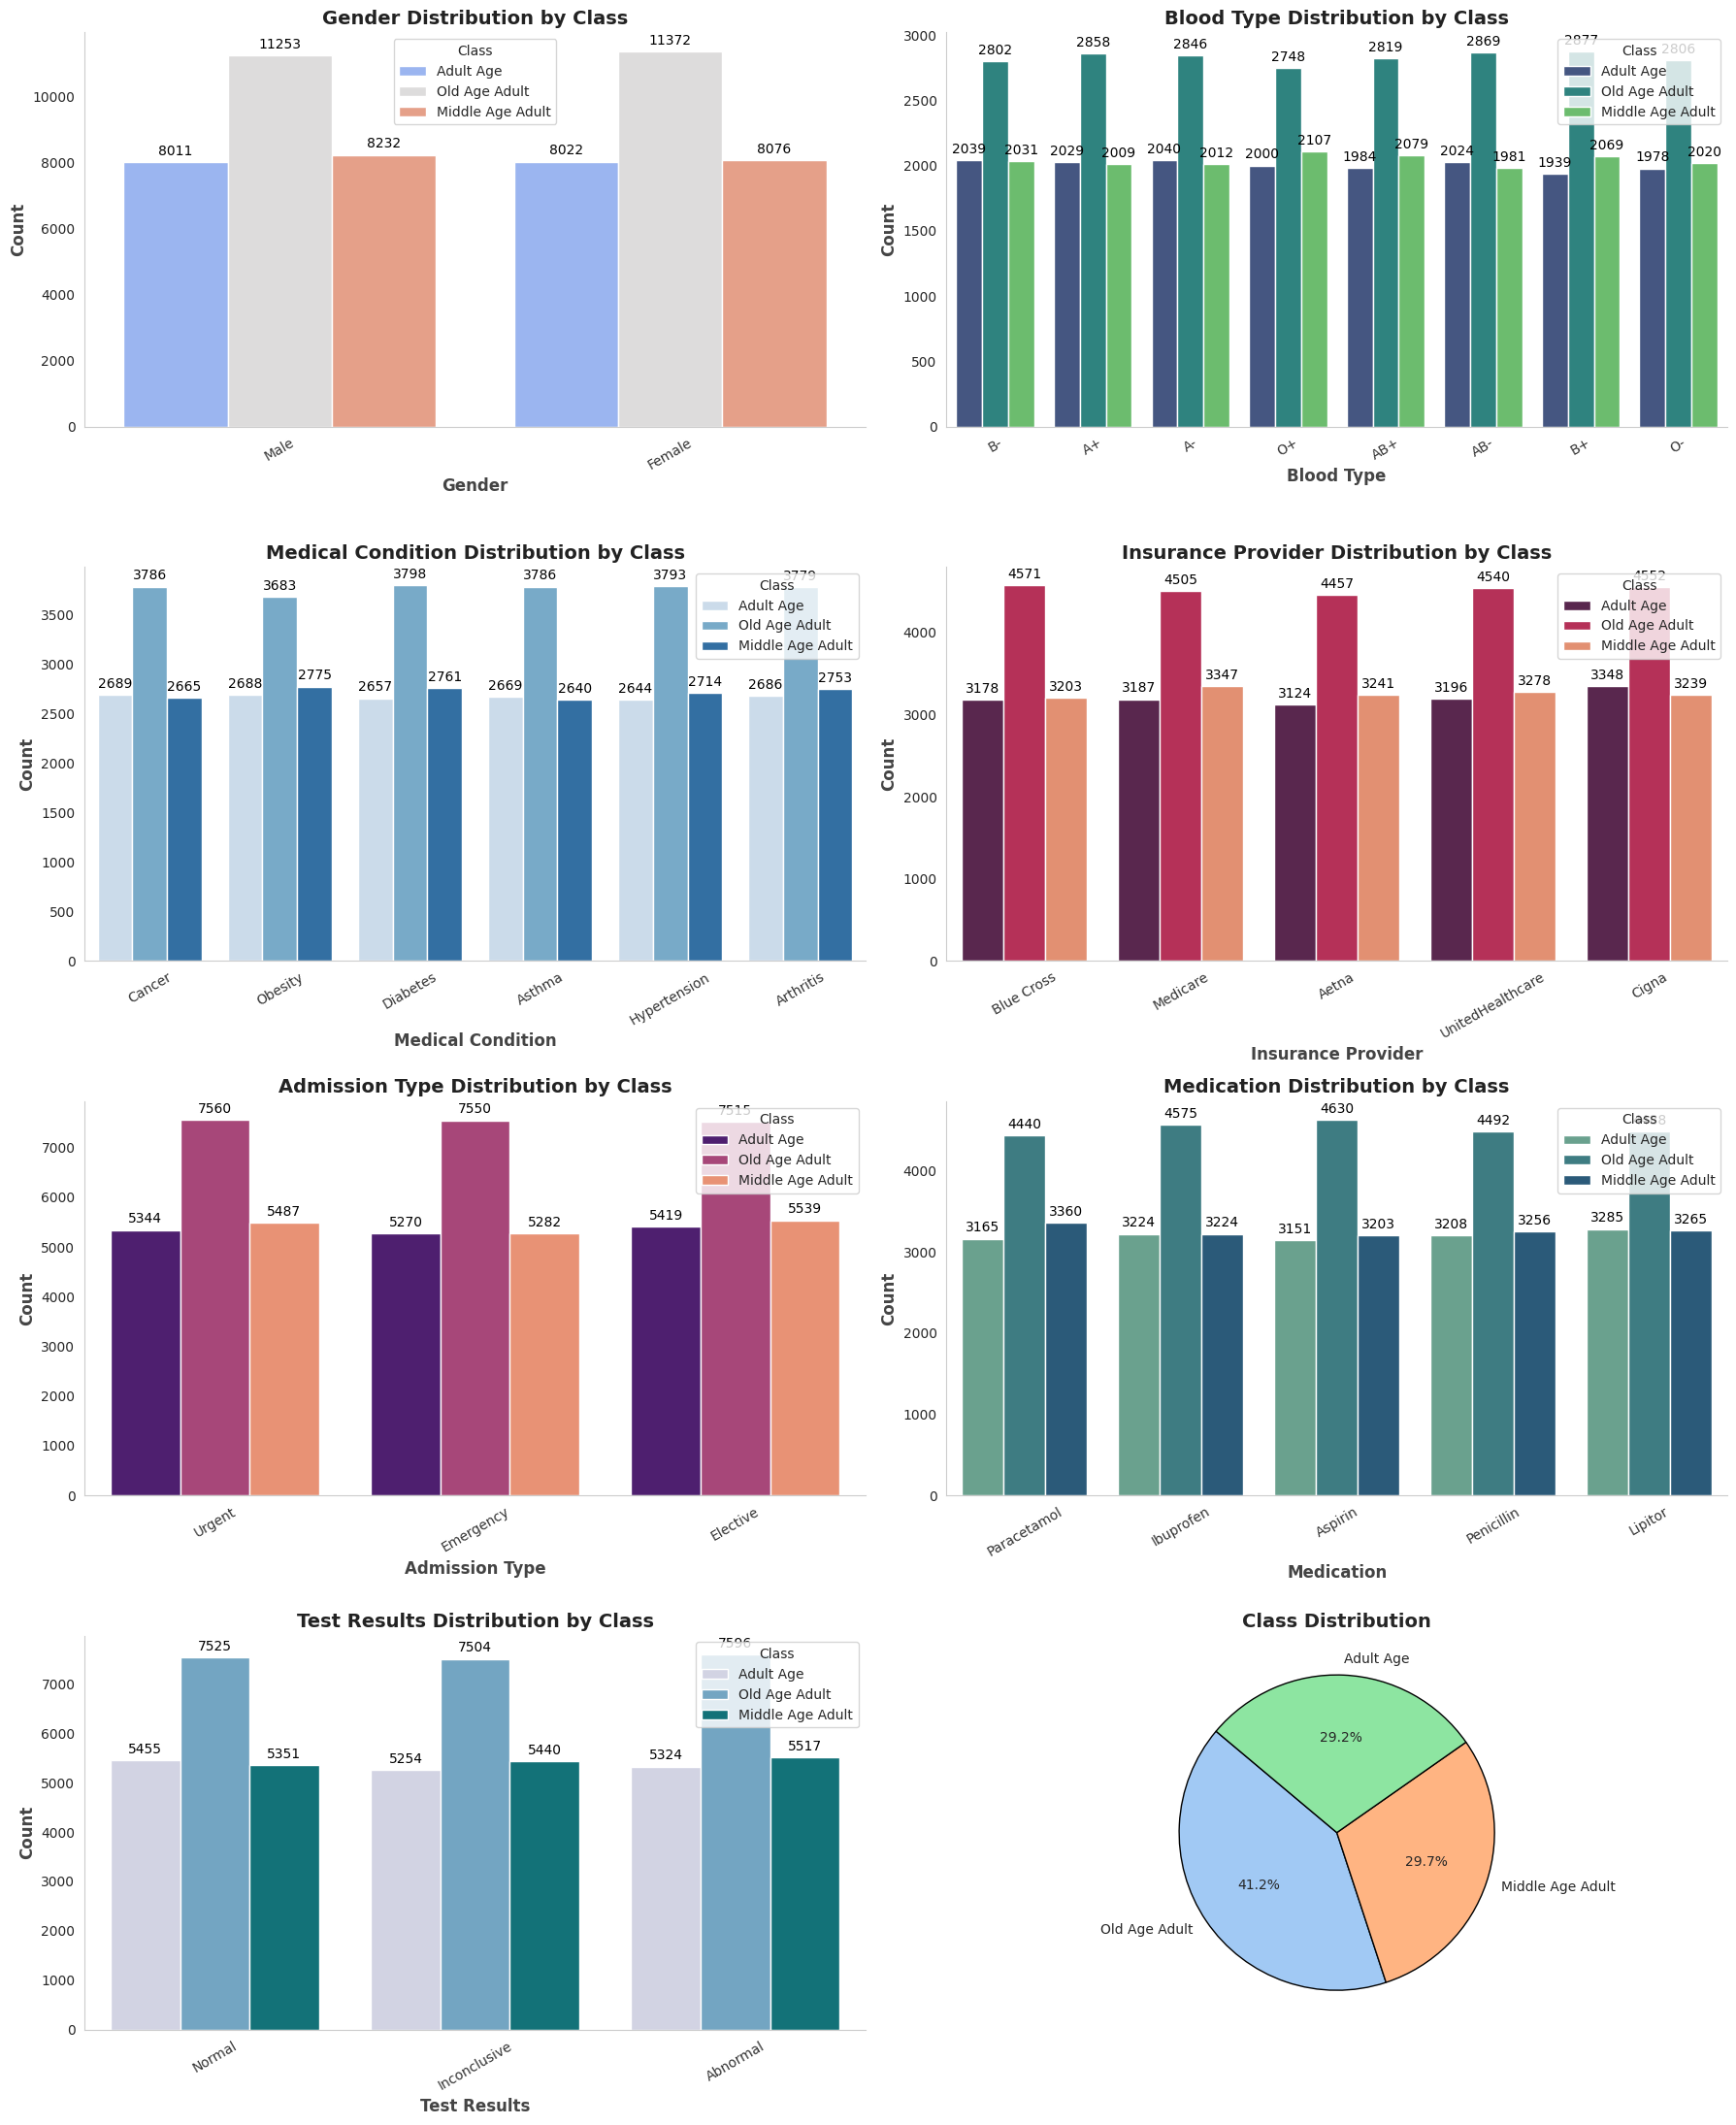

In [44]:
# Class wise distribution of patients:
# Set Seaborn style
sns.set_style("whitegrid")

# Define the figure and subplots (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(18, 22))

# List of bar chart columns
columns = ["Gender", "Blood Type", "Medical Condition", "Insurance Provider",
           "Admission Type", "Medication", "Test Results"]
palettes = ["coolwarm", "viridis", "Blues", "rocket", "magma", "crest", "PuBuGn"]  # Unique colors for each plot

# Generate the bar plots dynamically
for i, col in enumerate(columns):
    row, col_pos = divmod(i, 2)  # Get row and column position
    palette = palettes[i]  # Assign a different color palette to each plot

    ax = sns.countplot(data=df, x=col, hue="Class", ax=axes[row, col_pos], palette=palette)
    ax.grid(False)

    # Improve aesthetics
    ax.set_title(f"{col} Distribution by Class", fontsize=14, fontweight='bold', color='#222')
    ax.set_xlabel(col, fontsize=12, fontweight='bold', color='#444')
    ax.set_ylabel("Count", fontsize=12, fontweight='bold', color='#444')
    ax.tick_params(axis='x', rotation=30, labelsize=10, colors='#333')

    # Add labels on bars
    for container in ax.containers:
        ax.bar_label(container, fontsize=10, color='black', padding=3)

    # Remove top & right spines for a cleaner look
    sns.despine(ax=ax)

# Create a pie chart for "Class" in the last subplot
colors = sns.color_palette("pastel")
axes[3, 1].pie(df["Class"].value_counts(), labels=df["Class"].value_counts().index,
               autopct='%.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

axes[3, 1].set_title("Class Distribution", fontsize=14, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<ipython-input-45-52f49dab06b3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sorted_df, x="Billing Amount", y="Name", palette="Reds_r")


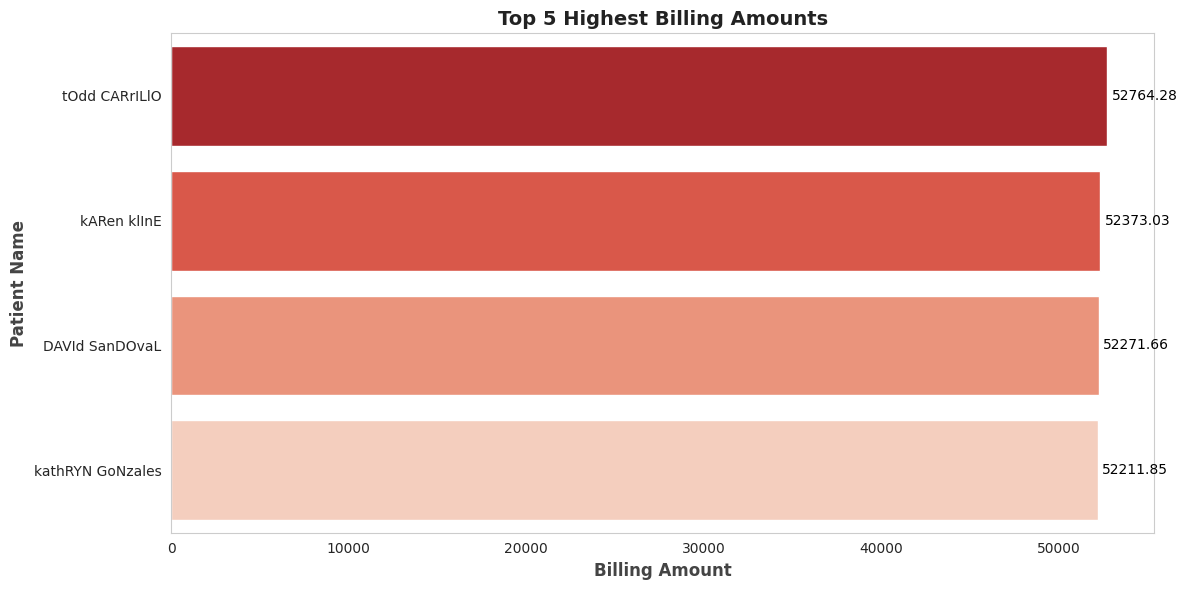

In [45]:
# Top 5 Highest Billing Records

# Sort the data by Billing Amount in descending order
sorted_df = df.sort_values("Billing Amount", ascending=False).head(5)  # Show top 5 highest billing records

# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a bar plot
ax = sns.barplot(data=sorted_df, x="Billing Amount", y="Name", palette="Reds_r")
ax.grid(False)
# Add annotations (billing amount values on bars)
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", fontsize=10, color="black", padding=3)

# Improve aesthetics
ax.set_title("Top 5 Highest Billing Amounts", fontsize=14, fontweight="bold", color="#222")
ax.set_xlabel("Billing Amount", fontsize=12, fontweight="bold", color="#444")
ax.set_ylabel("Patient Name", fontsize=12, fontweight="bold", color="#444")

# Show the plot
plt.tight_layout()
plt.show()

In [46]:
# Calculate number of days hospitalized:
# Extract days directly & using absolute so that negative value becomes positive
df['Days hospitalized'] = (df['Discharge Date'] - df['Date of Admission']).dt.days.abs()
# Display the first few rows
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Class,Days hospitalized
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Adult Age,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Old Age Adult,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Old Age Adult,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Adult Age,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,Middle Age Adult,20


<ipython-input-47-9febff6ccb0b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bx = sns.barplot(data=sorted_df, x="Days hospitalized", y="Name", palette="Purples")


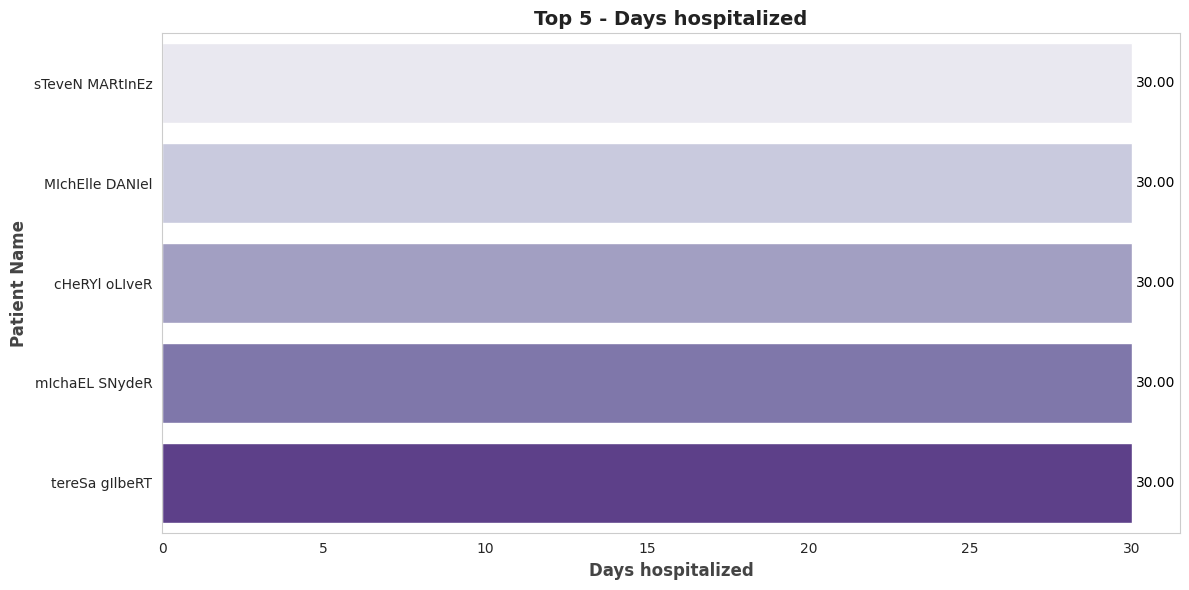

In [47]:
# Top 5 Days hospitalized Records
# Sort the data by Days hospitalized in descending order
sorted_df = df.sort_values("Days hospitalized", ascending=False).head(5)  # Show top 5 Days hospitalized records

# Set figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create a bar plot
bx = sns.barplot(data=sorted_df, x="Days hospitalized", y="Name", palette="Purples")
bx.grid(False)
# Add annotations (Days hospitalized values on bars)
for container in bx.containers:
    bx.bar_label(container, fmt="%.2f", fontsize=10, color="black", padding=3)

# Improve aesthetics
bx.set_title("Top 5 - Days hospitalized", fontsize=14, fontweight="bold", color="#222")
bx.set_xlabel("Days hospitalized", fontsize=12, fontweight="bold", color="#444")
bx.set_ylabel("Patient Name", fontsize=12, fontweight="bold", color="#444")

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-48-4f4065a775e8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=room_stay, x="Room Number", y="Days hospitalized", palette="viridis")


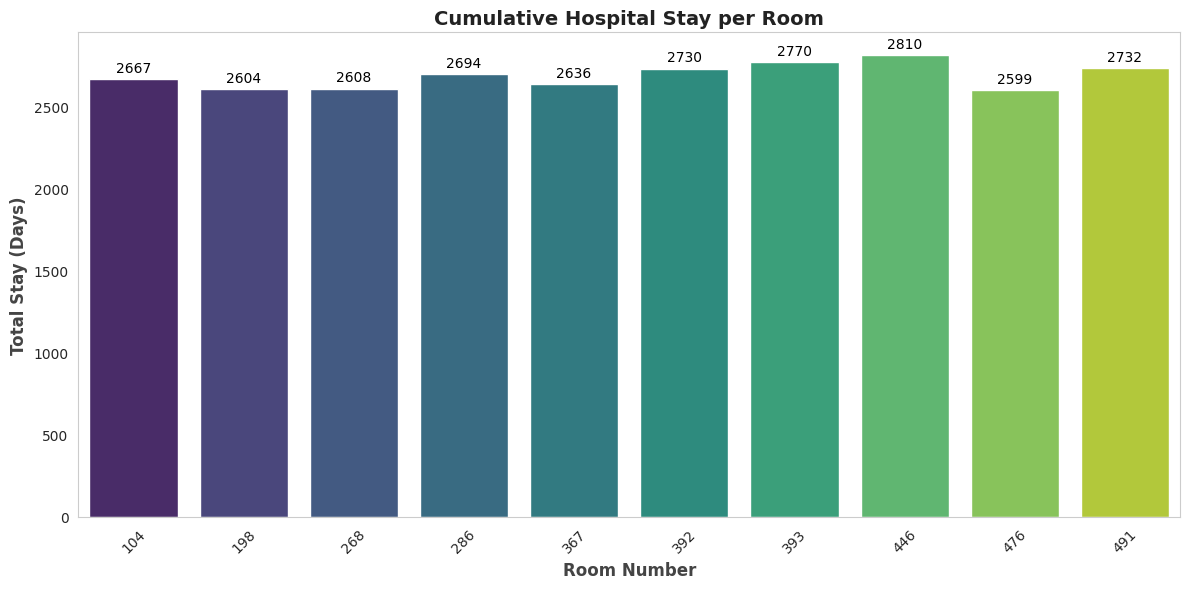

In [48]:
#Top 10 Cumulative Hospital Stay per Room:
# Group by Room Number and sum Length of Stay
room_stay = df.groupby('Room Number')['Days hospitalized'].sum().reset_index()

# Sort by Length of Stay for better visualization
room_stay = room_stay.sort_values(by="Days hospitalized", ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=room_stay, x="Room Number", y="Days hospitalized", palette="viridis")

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", fontsize=10, color="black", padding=3)

# Improve aesthetics
ax.set_title("Cumulative Hospital Stay per Room", fontsize=14, fontweight="bold", color="#222")
ax.set_xlabel("Room Number", fontsize=12, fontweight="bold", color="#444")
ax.set_ylabel("Total Stay (Days)", fontsize=12, fontweight="bold", color="#444")
ax.tick_params(axis='x', rotation=45)  # Rotate x labels if needed

# Remove grid for a cleaner look
ax.grid(False)

# Show plot
plt.tight_layout()
plt.show()

In [49]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load dataset
def load_dataset():
    df = pd.read_csv("/content/healthcare_dataset.csv")
    numerical_features = ['Age', 'Billing Amount']
    X = df[numerical_features]

    categorical_features = ['Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital',
                            'Insurance Provider', 'Admission Type', 'Medication', 'Room Number']
    for feature in categorical_features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature].astype(str))

    X = pd.concat([X, df[categorical_features]], axis=1)
    y = df["Test Results"]

    return X, y

# Train and evaluate different perceptron models
def train_and_evaluate_models(X, y, epochs=200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train[['Age', 'Billing Amount']] = scaler.fit_transform(X_train[['Age', 'Billing Amount']])
    X_test[['Age', 'Billing Amount']] = scaler.transform(X_test[['Age', 'Billing Amount']])

    models = {
        "Single-Layer Single Perceptron": MLPClassifier(hidden_layer_sizes=(), activation='relu', solver='adam', max_iter=epochs, random_state=42),
        "Multi-Layer Multi Perceptron": MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=epochs, random_state=42),
        "Single-Layer Multiple Perceptron": MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', max_iter=epochs, random_state=42)
    }

    best_model = None
    best_accuracy = 0

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{name} Accuracy: {accuracy:.2f}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    return best_model, scaler

# Save the best model
def save_model(model, scaler, filename="best_model.pkl"):
    with open(filename, "wb") as f:
        pickle.dump({"model": model, "scaler": scaler}, f)
    print(f"Best model saved to {filename}")

save_model_flag = True
epochs = 200  # Set desired number of epochs
X, y = load_dataset()
best_model, scaler = train_and_evaluate_models(X, y, epochs)

if save_model_flag:
    save_model(best_model, scaler)


Single-Layer Single Perceptron Accuracy: 0.33


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Multi-Layer Multi Perceptron Accuracy: 0.34
Single-Layer Multiple Perceptron Accuracy: 0.34
Best model saved to best_model.pkl
